In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Shubham Ekapure/Desktop/ML/Insurance_Marketing-Customer-Value-Analysis (1).csv')

In [3]:
df.head(1)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


# Data Visulisation and Relation

<BarContainer object of 9134 artists>

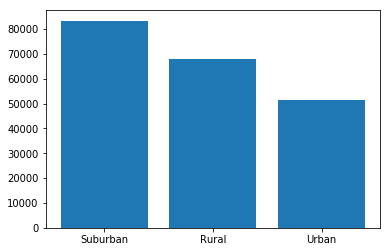

In [4]:
plt.bar(df['Location Code'],df['Customer Lifetime Value'])

<BarContainer object of 9134 artists>

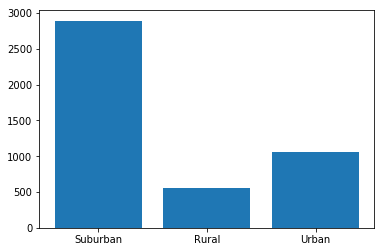

In [5]:
plt.bar(df['Location Code'],df['Total Claim Amount'])

<BarContainer object of 9134 artists>

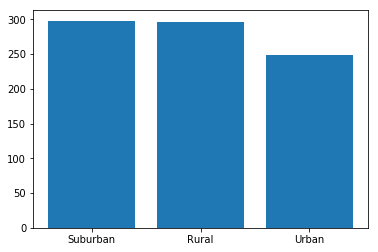

In [6]:
plt.bar(df['Location Code'],df['Monthly Premium Auto'])

<BarContainer object of 9134 artists>

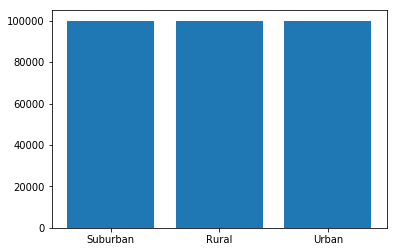

In [7]:
plt.bar(df['Location Code'],df['Income'])

In [8]:
df["Monthly Premium Auto"].describe()

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

In [9]:
df["Months Since Last Claim"].describe()

count    9134.000000
mean       15.097000
std        10.073257
min         0.000000
25%         6.000000
50%        14.000000
75%        23.000000
max        35.000000
Name: Months Since Last Claim, dtype: float64

## HOW MALE AND FEMALE EDUACTION LEVEL EFFECT THE RESULT

In [10]:
maledata = df[df['Gender']=='M']
femaledata = df[df['Gender']=='F']

In [11]:
maledata["Education"].value_counts()

College                 1329
Bachelor                1325
High School or Below    1301
Master                   348
Doctor                   173
Name: Education, dtype: int64

In [12]:
femaledata["Education"].value_counts()

Bachelor                1423
College                 1352
High School or Below    1321
Master                   393
Doctor                   169
Name: Education, dtype: int64

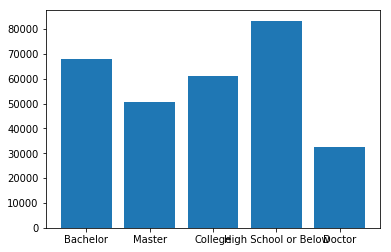

In [13]:
p1 = plt.bar(maledata["Education"],maledata["Customer Lifetime Value"],label='men')
plt.title = ("Male")

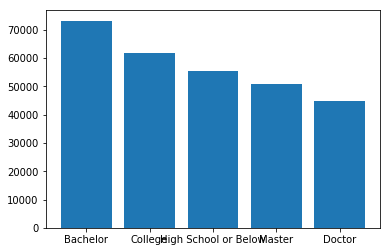

In [14]:
p2 = plt.bar(femaledata["Education"],femaledata["Customer Lifetime Value"],label='female')
plt.title= ("Female comparision")

# Applying our model to the dataset

data["Aggargate amount payed"] = ((data["Months Since Policy Inception"]+data["Months Since Last Claim"])*data["Monthly Premium Auto"]) - data["Total Claim Amount"]

In [15]:
#df['Vehicle Class'] = df['Vehicle Class'].replace({'Luxury SUV': 20, 'Luxury Car': 12, 'Sports Car': 10, 'SUV':10,'Four-Door Car':5,'Two-Door Car':5})

In [17]:
#i=0 while (i < 9134): if df['Gender'][i] == 'F': df['Gender'][i] = 0 elif df['Gender'][i] == 'M': df['Gender'][i] = 1

#i = i + 1

In [18]:
#The final model

In [23]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
#mnt since last claim>inception
  
# Encode labels in column 'species'. 
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['State']= label_encoder.fit_transform(df['State'])
df['Response']= label_encoder.fit_transform(df['Response'])
df['Coverage']= label_encoder.fit_transform(df['Coverage'])
df['Vehicle Class']= label_encoder.fit_transform(df['Vehicle Class'])
df['Vehicle Size']= label_encoder.fit_transform(df['Vehicle Size'])
df['Sales Channel']= label_encoder.fit_transform(df['Sales Channel'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['EmploymentStatus']= label_encoder.fit_transform(df['EmploymentStatus'])
df['Location Code']= label_encoder.fit_transform(df['Location Code'])
df['Marital Status']= label_encoder.fit_transform(df['Marital Status'])
df['Policy Type']= label_encoder.fit_transform(df['Policy Type'])
df['Policy']= label_encoder.fit_transform(df['Policy'])
df['Renew Offer Type']= label_encoder.fit_transform(df['Renew Offer Type'])

In [24]:
df.head(1)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,4,2763.519279,0,0,0,2/24/2011,1,0,56274,...,5,0,1,0,2,0,0,384.811147,5,1


In [25]:
df = df.drop(['Customer','Effective To Date'],axis=1)

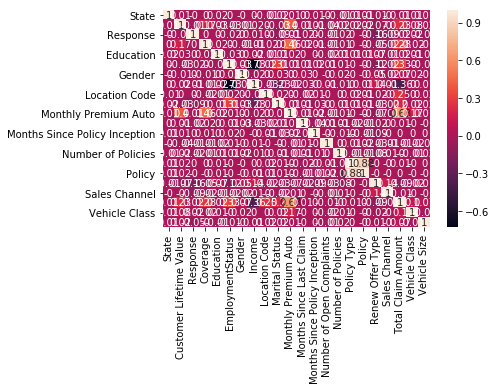

In [26]:
correlation_matrix = df.corr().round(2)

# annot = True to print the values inside the square

sns.heatmap(data=correlation_matrix, annot=True)

In [27]:
data=df

In [28]:
x_train = data.iloc[1:6000 ,0: ]
y_train = data.iloc[1:6000 , [1]]
x_test = data.iloc[6000: ,0: ]
y_test = data.iloc[6000: , [1]]
x_train = x_train.drop(['Customer Lifetime Value'] , axis=1)
x_test = x_test.drop(['Customer Lifetime Value'] , axis=1)

In [29]:
y_train = y_train.as_matrix()
x_train = x_train.as_matrix()
x_test = x_test.as_matrix()

C:\Users\Shubham Ekapure\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Shubham Ekapure\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Shubham Ekapure\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
A = np.squeeze(np.asarray(y_train))
y_train.reshape(-1,1)
y_train

array([[ 6979.535903],
       [12887.43165 ],
       [ 7645.861827],
       ...,
       [ 5568.947534],
       [ 2594.809242],
       [ 8646.504109]])

In [31]:
x_train.shape

(5999, 21)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators =100 , random_state = 5,max_features=20,min_samples_leaf=1,oob_score = True,min_samples_split=2) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)




C:\Users\Shubham Ekapure\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [33]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1470.2884977660976
14743785.172879374
3839.7636871140094


0.7107237944390259

# Various Models

In [34]:
# Linear Regression with multiple variable
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
Y_Pred = regressor.predict(x_test)

In [37]:
regressor.score(x_test,y_test)

0.14381497768082863

In [39]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
print('r2 score: %.2f' % r2_score(y_test,Y_Pred))
print('mae :%.2f' % mean_absolute_error(y_test,Y_Pred))

r2 score: 0.14
mae :3996.25


In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [44]:
y = dt.predict(x_test)
print('r2 score: %.2f' % r2_score(y_test,y))
print('mae :%.2f' % mean_absolute_error(y_test,y))

r2 score: 0.51
mae :1654.88
